In [24]:
import pandas as pd

In [25]:
DATA_PATH = '../data/'

In [26]:
train_data = pd.read_csv(DATA_PATH + 'polyphar_train.csv')
valid_data = pd.read_csv(DATA_PATH + 'polyphar_validate.csv')
test_data = pd.read_csv(DATA_PATH + 'polyphar_test.csv')

,from,rel,to
count,3.661895e+06,3.661895e+06,3.661895e+06
mean,3.408311e+02,4.957052e+02,3.282338e+02
std,1.816222e+02,2.823224e+02,1.875923e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.990000e+02,2.420000e+02,1.640000e+02
50%,3.580000e+02,5.110000e+02,3.320000e+02
75%,5.000000e+02,7.400000e+02,4.980000e+02
max,6.440000e+02,9.620000e+02,6.440000e+02


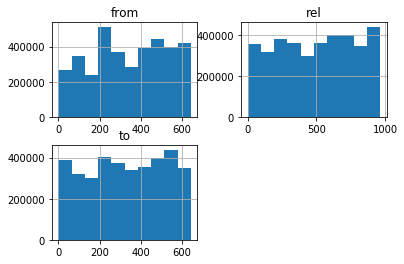

In [27]:
train_data.hist()

train_data.describe()

In [28]:
train_data_630 = train_data[(train_data['from'] > 630) | (train_data['to'] > 630)]

In [29]:
print('Count of elements with from/to element > 630:', len(train_data_630))
print('Count of elements in train:', len(train_data))
print('Percent from all train data is', len(train_data_630) / len(train_data) * 100)

Count of elements with from/to element > 630: 142439
Count of elements in train: 3661895
Percent from all train data is 3.88976199481416


In [30]:
train_data_630.describe()

,from,rel,to
count,142439.000000,142439.000000,142439.000000
mean,461.099748,500.419808,507.785705
std,202.048712,281.483345,198.572391
min,0.000000,0.000000,2.000000
25%,298.000000,249.000000,385.000000
50%,541.000000,520.000000,636.000000
75%,639.000000,742.000000,639.000000
max,644.000000,962.000000,644.000000


In [31]:
train_data_630

,from,rel,to
32,84,442,642
33,296,442,642
36,642,442,299
39,642,442,400
120,479,442,642
...,...,...,...
3661799,639,299,480
3661805,639,299,539
3661831,639,299,310
3661865,135,299,639


In [32]:
train_data = train_data[~((train_data['from'] > 630) | (train_data['to'] > 630))]

In [33]:
train_data_630 = train_data_630.reset_index().drop(columns=['index'])

In [34]:
train_data_630 = train_data_630.sample(frac=1).reset_index(drop=True)

In [35]:
train_data_630['val'] = pd.Series([0 for _ in range(len(train_data_630) // 2)] + 
                                  [1 for _ in range(len(train_data_630) // 2 + 1)])

In [36]:
train_data_630

,from,rel,to,val
0,406,136,642,0
1,482,635,639,0
2,639,511,118,0
3,639,216,170,0
4,637,572,484,0
...,...,...,...,...
142434,301,572,634,1
142435,639,879,2,1
142436,639,334,194,1
142437,335,86,639,1


In [37]:
extra_valid = train_data_630[train_data_630['val'] == 1].drop(columns=['val'])
extra_test = train_data_630[train_data_630['val'] == 0].drop(columns=['val'])

In [38]:
valid_data = pd.concat([valid_data, extra_valid])

In [39]:
test_data = pd.concat([test_data, extra_test])

In [40]:
train_data.to_csv('../new_data/polyphar_train.csv', index=False)
valid_data.to_csv('../new_data/polyphar_validate.csv', index=False)
test_data.to_csv('../new_data/polyphar_test.csv', index=False)


In [41]:
test_data_seen = test_data[~((test_data['from'] > 630) | (test_data['to'] > 630))]
test_data_630 = test_data[(test_data['from'] > 630) | (test_data['to'] > 630)]

In [42]:
test_data_seen.to_csv('../new_data/polyphar_test_seen.csv', index=False)
test_data_630.to_csv('../new_data/polyphar_test_new.csv', index=False)